<a href="https://colab.research.google.com/github/RishabhXYZA/Kaggle-TSS-Hack-3/blob/main/Thapar_Summer_School_Kaggle_hack_iii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TSS Hack-3 Kaggle**
**(Evaluation done on RMAE)**

**Using Linear Regression**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare training features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']

# Optional: split into train/val to evaluate R² properly
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set
val_predictions = model.predict(X_val)

# Calculate R² score
r2 = r2_score(y_val, val_predictions)
print(f"R² Score on validation set: {r2:.4f}")

# Predict on test set
X_test = test_df.drop(columns=['id', 'Row#'])
test_predictions = model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_predictions
})
submission.to_csv("submission.csv", index=False)


R² Score on validation set: 0.9114


**Using Decision Tree Regressor**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare training features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']

# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
val_predictions = model.predict(X_val)

# Compute R² score
r2 = r2_score(y_val, val_predictions)
print(f"R² Score on validation set: {r2:.4f}")

# Prepare test features and make predictions
X_test = test_df.drop(columns=['id', 'Row#'])
test_predictions = model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_predictions
})
submission.to_csv("submission.csv", index=False)


R² Score on validation set: 0.8517


**Using AdaBoost and Decision Tree Regressor**

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare training features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost Regressor with Decision Tree as base estimator
base_estimator = DecisionTreeRegressor(max_depth=5)
model = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
val_predictions = model.predict(X_val)

# Calculate R² score
r2 = r2_score(y_val, val_predictions)
print(f"R² Score on validation set: {r2:.4f}")

X_test = test_df.drop(columns=['id', 'Row#'])
test_predictions = model.predict(X_test)


submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_predictions
})
submission.to_csv("submission.csv", index=False)

R² Score on validation set: 0.8860


**Using Decision Tree with PCA and Outlier Removal**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Separate features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Feature Scaling (required before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=10)  # You can change n_components as needed
X_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
val_predictions = model.predict(X_val)
r2 = r2_score(y_val, val_predictions)
print(f"R² Score on validation set: {r2:.4f}")


test_predictions = model.predict(X_test_pca)


submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_predictions
})
submission.to_csv("submission.csv", index=False)


R² Score on validation set: 0.8024


**Using Lasso Regressor**

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Scale features (important for Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train Lasso Regression model
model = Lasso(alpha=0.1, random_state=42)  # You can tune alpha
model.fit(X_train, y_train)

# Predict and evaluate on validation set
val_predictions = model.predict(X_val)
r2 = r2_score(y_val, val_predictions)
print(f"R² Score on validation set: {r2:.4f}")

# Predict on test set
test_predictions = model.predict(X_test_scaled)

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_predictions
})
submission.to_csv("submission.csv", index=False)


R² Score on validation set: 0.9114


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.076e+07, tolerance: 1.276e+06
  model = cd_fast.enet_coordinate_descent(


**Using KNN (K-Neighbours) Model**

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Feature scaling (very important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train KNN Regressor
model = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors
model.fit(X_train, y_train)

# Predict on validation set
val_predictions = model.predict(X_val)
r2 = r2_score(y_val, val_predictions)
print(f"R² Score on validation set: {r2:.4f}")

test_predictions = model.predict(X_test_scaled)

submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_predictions
})
submission.to_csv("Rishabh_Bhasin_7009.csv", index=False)


R² Score on validation set: 0.8790


**Using Bayesian Ridge**

In [ ]:
import pandas as pd
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train Bayesian Ridge Regression model
model = BayesianRidge()
model.fit(X_train, y_train)

# Predict and evaluate on validation set
val_predictions = model.predict(X_val)
r2 = r2_score(y_val, val_predictions)
print(f"R² Score on validation set: {r2:.4f}")

# Predict on test data
test_predictions = model.predict(X_test_scaled)

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_predictions
})
submission.to_csv("Rishabh_Bhasin_7009_(1).csv", index=False)


R² Score on validation set: 0.9115


**Using Random Forest Regressor**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Scale features (optional for Random Forest, but helps for comparison)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set and compute R² score
val_predictions = model.predict(X_val)
r2 = r2_score(y_val, val_predictions)
print(f"R² Score on validation set: {r2:.4f}")

# Predict on test set
test_predictions = model.predict(X_test_scaled)

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_predictions
})
submission.to_csv("submission.csv", index=False)


R² Score on validation set: 0.9248


**Using Random Forest Regressor with Outlier Removal**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Separate features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Outlier removal (optional - basic z-score logic)
from scipy.stats import zscore
X_numeric = X.select_dtypes(include='number')
z_scores = zscore(X_numeric)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Train Random Forest Regressor with tuned parameters
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Validation R² score
val_predictions = model.predict(X_val)
r2 = r2_score(y_val, val_predictions)
print(f"R² Score on validation set: {r2:.4f}")

# Predict on test set
test_predictions = model.predict(X_test_scaled)

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_predictions
})
submission.to_csv("Rishabh_Bhasin_7009_(2).csv", index=False)


R² Score on validation set: 0.9186


**Using RF with Hypertuned model**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import zscore

# Load the dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Drop unneeded columns
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Remove outliers using z-score
z_scores = zscore(X.select_dtypes(include='number'))
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Feature Selection (keep only top 20 most relevant)
selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X_scaled, y)
X_test_selected = selector.transform(X_test_scaled)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.15, random_state=42)

# Optimized Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Evaluate on validation set
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation set: {r2:.4f}")

# Predict on test data
test_preds = model.predict(X_test_selected)

# Save submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission_path = "submission_optimized_rf.csv"
submission.to_csv(submission_path, index=False)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=16. All the features will be returned.
  warnings.warn(


✅ R² Score on validation set: 0.9209


**Using LGBM Regressor**

In [ ]:
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Feature/Target separation
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Outlier removal (z-score method)
z_scores = zscore(X.select_dtypes(include='number'))
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Feature selection (top 20 best)
selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X_scaled, y)
X_test_selected = selector.transform(X_test_scaled)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.15, random_state=42)

# Train LGBM model
model = LGBMRegressor(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.05,
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate R²
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"R² Score on validation set: {r2:.4f}")

# Predict on test data
test_preds = model.predict(X_test_selected)

# Save submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_lgbm.csv", index=False)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=16. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 7576, number of used features: 16
[LightGBM] [Info] Start training from score 6013.503117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Using LGBM with Outlier Removal**

In [ ]:
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Split features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Remove outliers using Z-score method
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Feature selection - keep top 20 features
selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X_scaled, y)
X_test_selected = selector.transform(X_test_scaled)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.15, random_state=42)

# Train LGBM Regressor
model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)

# Validate and evaluate
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation set: {r2:.4f}")

# Predict on test data
test_preds = model.predict(X_test_selected)

# Save submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_lgbm_outlier.csv", index=False)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=16. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 7576, number of used features: 16
[LightGBM] [Info] Start training from score 6013.503117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ R² Score on validation set: 0.9214


**Using MLP Regressor**

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Remove outliers using z-score
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Feature selection (top 20)
selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X_scaled, y)
X_test_selected = selector.transform(X_test_scaled)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.15, random_state=42)

# Train MLPRegressor (Neural Network)
model = MLPRegressor(hidden_layer_sizes=(128, 64, 32),
                     activation='relu',
                     solver='adam',
                     max_iter=1000,
                     random_state=42)
model.fit(X_train, y_train)

# Evaluate on validation set
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation set: {r2:.4f}")

# Predict on test set
test_preds = model.predict(X_test_selected)

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_mlp.csv", index=False)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=16. All the features will be returned.
  warnings.warn(


✅ R² Score on validation set: 0.9110


**Using XGB Regressor**

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare inputs
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Outlier removal (Z-score method)
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Select top 20 features
selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X_scaled, y)
X_test_selected = selector.transform(X_test_scaled)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.15, random_state=42)

# Train XGBoost Regressor
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)
model.fit(X_train, y_train)

# Evaluate performance
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation set: {r2:.4f}")

# Predict on test set
test_preds = model.predict(X_test_selected)

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_xgb.csv", index=False)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=16. All the features will be returned.
  warnings.warn(


✅ R² Score on validation set: 0.9138


**Using Symbolic Regression**

In [ ]:
pip install gplearn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from gplearn.genetic import SymbolicRegressor
from scipy.stats import zscore

# Load the dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Outlier removal using z-score
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Initialize and train Symbolic Regressor
model = SymbolicRegressor(
    population_size=1000,
    generations=30,
    tournament_size=20,
    stopping_criteria=0.001,
    const_range=(-5, 5),
    init_depth=(2, 6),
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Validation performance
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ Symbolic Regression R² on validation: {r2:.4f}")

# Predict on test data
test_preds = model.predict(X_test_scaled)

# Submission CSV
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_symbolic_regression.csv", index=False)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


   0    23.47          10988.1       63          5842.74              N/A      2.46m
   1    33.75           6010.6        9          4296.53              N/A      1.47m
   2    58.95          6473.74        9          4296.53              N/A      1.54m
   3    45.50          25118.2        9           4062.4              N/A      2.24m
   4    24.67          89612.3       17          3935.82              N/A      1.21m
   5    15.78           177245       15          3712.88              N/A      1.26m
   6    19.85           118722       11          3465.58              N/A      1.02m
   7    15.31           179116       11          3465.58              N/A      1.50m
   8    16.87           170487       17          3322.72              N/A     58.86s
   9    14.80           201158       87          3022.58              N/A     49.64s
  10    16.55           262698       73          3014.72              N/A     38.35s
  11    39.82           157384       85           2986.1         

**Using Gradient Boost Regressor**

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Split features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Outlier removal using Z-score method
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Feature selection (top 20 features)
selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X_scaled, y)
X_test_selected = selector.transform(X_test_scaled)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.15, random_state=42)

# Initialize and train Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate on validation set
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation set: {r2:.4f}")

# Predict on test data
test_preds = model.predict(X_test_selected)

# Save submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_gbr.csv", index=False)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=16. All the features will be returned.
  warnings.warn(


✅ R² Score on validation set: 0.9188


**Using GBR with PCA and Outlier removal**

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Separate features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Outlier removal using z-score
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# PCA for dimensionality reduction (keep 95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.15, random_state=42)

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate model
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation set: {r2:.4f}")

# Predict on test data
test_preds = model.predict(X_test_pca)

# Save submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_gbr_pca_outliers.csv", index=False)


✅ R² Score on validation set: 0.8898


**Using GBR with Outlier removal**

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load the datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Outlier removal using Z-score
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Initialize and train Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# Validation predictions and R² score
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation set: {r2:.4f}")

# Predict on test data
test_preds = model.predict(X_test_scaled)

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_gbr_outliers.csv", index=False)


✅ R² Score on validation set: 0.9188


**Using Passive Agressive Regression Model**

In [ ]:
import pandas as pd
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Remove outliers using z-score
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Initialize and train Passive Aggressive Regressor
model = PassiveAggressiveRegressor(
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model.fit(X_train, y_train)

# Validate model
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation set: {r2:.4f}")

# Predict on test data
test_preds = model.predict(X_test_scaled)

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_passive_aggressive.csv", index=False)


✅ R² Score on validation set: 0.9064


**Using XGB hypertuned model**

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Separate features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Outlier removal using z-score
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize model
xgb = XGBRegressor(random_state=42, verbosity=0)

# Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate on validation set
val_preds = best_model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print("✅ Best Params:", grid_search.best_params_)
print(f"✅ R² Score on validation set: {r2:.4f}")

# Predict on test set
test_preds = best_model.predict(X_test_scaled)

# Create submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_xgb_hypertuned.csv", index=False)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
✅ Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
✅ R² Score on validation set: 0.9240


**Using XGB with learning curve**

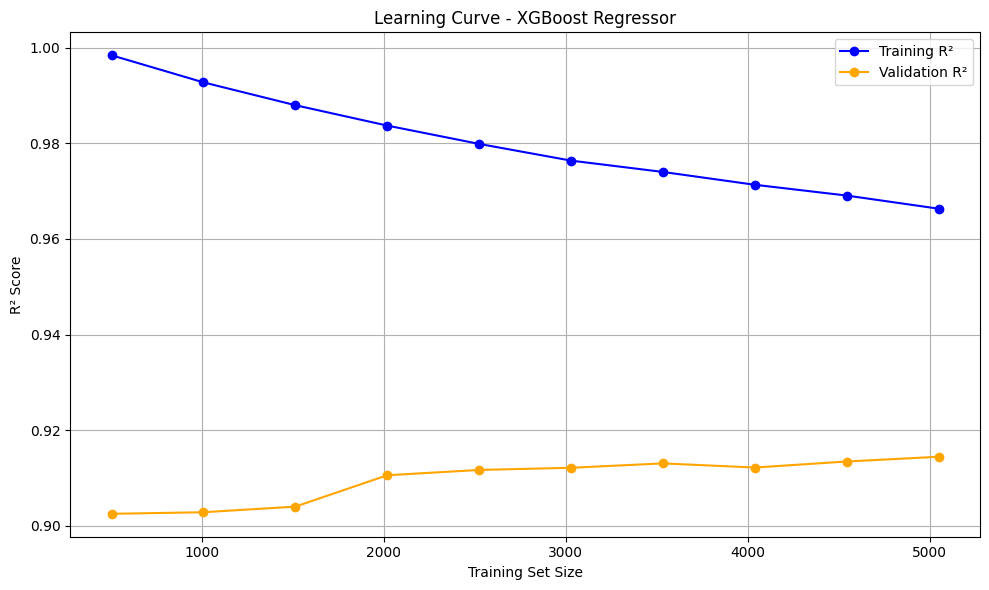

✅ R² Score on validation set: 0.9216


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Feature-target split
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Outlier removal using z-score
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Initialize XGBoost model
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)

# Plot learning curve
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=3,
    scoring='r2',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training R²", color='blue')
plt.plot(train_sizes, val_scores_mean, 'o-', label="Validation R²", color='orange')
plt.title("Learning Curve - XGBoost Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Train final model on full training data
model.fit(X_train, y_train)

# Evaluate on validation set
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation set: {r2:.4f}")

# Predict on test set
test_preds = model.predict(X_test_scaled)

# Save submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_xgb_learning_curve.csv", index=False)


**Using Linear Regression with Polynomial Feature**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Separate features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Outlier removal using z-score
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.15, random_state=42)

# Fit linear regression on polynomial features
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation set: {r2:.4f}")

# Predict on test data
test_preds = model.predict(X_test_poly)

# Save submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_polynomial.csv", index=False)


✅ R² Score on validation set: 0.8915


**Using XGB with PEP(Prediction Error Plot)**

✅ R² Score on validation set: 0.9216


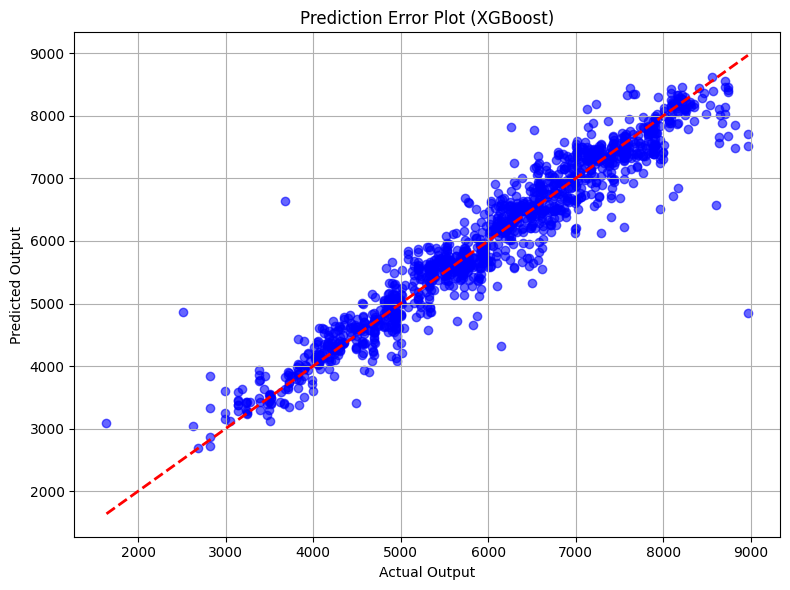

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Outlier removal using z-score
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Train XGBoost Regressor
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)
model.fit(X_train, y_train)

# Predictions on validation set
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation set: {r2:.4f}")

# 📉 Prediction Error Plot (Actual vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_val, val_preds, alpha=0.6, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.title("Prediction Error Plot (XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Predict on test data
test_preds = model.predict(X_test_scaled)

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_xgb_prediction_error_plot.csv", index=False)


**Using Extra Tress Regressor**

In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Outlier removal using z-score
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Initialize and train Extra Trees Regressor
model = ExtraTreesRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Evaluate on validation set
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation set: {r2:.4f}")

# Predict on test data
test_preds = model.predict(X_test_scaled)

# Save submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_extra_trees.csv", index=False)


✅ R² Score on validation set: 0.9151


**Extra Trees with Outlier Removal**

In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Separate features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# ✅ Outlier removal using Z-score
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# ✅ Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# ✅ Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)

# ✅ Initialize and train Extra Trees Regressor
model = ExtraTreesRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# ✅ Evaluate on validation set
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation set: {r2:.4f}")

# ✅ Predict on test data
test_preds = model.predict(X_test_scaled)

# ✅ Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_extra_trees_outliers.csv", index=False)


✅ R² Score on validation set: 0.9151


**Using Huber Regressor**

In [ ]:
import pandas as pd
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Separate features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# ✅ Outlier removal using Z-score
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# ✅ Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# ✅ Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)

# ✅ Initialize and train Huber Regressor
model = HuberRegressor(
    epsilon=1.35,  # default is 1.35; tune this if needed
    max_iter=1000,
    alpha=0.0001
)
model.fit(X_train, y_train)

# ✅ Evaluate model
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation set: {r2:.4f}")

# ✅ Predict on test set
test_preds = model.predict(X_test_scaled)

# ✅ Save submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_huber.csv", index=False)


✅ R² Score on validation set: 0.8816


**Using Catboost Regressor**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Split features/target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Outlier removal using IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X = X[mask]
y = y[mask]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Split for validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# First CatBoost run for feature selection
selector_model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    silent=True,
    random_state=42
)
selector_model.fit(X_train, y_train)
selector = SelectFromModel(selector_model, threshold="median", prefit=True)

# Reduce features
X_train_sel = selector.transform(X_train)
X_val_sel = selector.transform(X_val)
X_test_sel = selector.transform(X_test_scaled)

# Final CatBoost model
final_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=8,
    loss_function='RMSE',
    early_stopping_rounds=50,
    random_state=42,
    verbose=100
)
final_model.fit(X_train_sel, y_train, eval_set=(X_val_sel, y_val))

# Evaluate
val_preds = final_model.predict(X_val_sel)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² on validation: {r2:.5f}")

# Predict on test
test_preds = final_model.predict(X_test_sel)

# Save submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_catboost_fresh.csv", index=False)


0:	learn: 1249.7160923	test: 1245.4690240	best: 1245.4690240 (0)	total: 5.79ms	remaining: 5.78s
100:	learn: 363.5113961	test: 396.4623385	best: 396.4623385 (100)	total: 409ms	remaining: 3.64s
200:	learn: 343.0522191	test: 387.2352788	best: 387.2235921 (199)	total: 832ms	remaining: 3.31s
300:	learn: 333.8870758	test: 386.2680490	best: 386.2328205 (280)	total: 1.25s	remaining: 2.9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 385.946291
bestIteration = 347

Shrink model to first 348 iterations.
✅ R² on validation: 0.90867


**Using Catboost Tuned  Model**

In [ ]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# ✅ Outlier removal using Z-score
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X, y = X[mask], y[mask]

# ✅ Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# ✅ Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)

# ✅ Focused Hypertuned CatBoost
model = CatBoostRegressor(
    iterations=1200,
    learning_rate=0.025,
    depth=8,
    l2_leaf_reg=3,
    bagging_temperature=0.4,
    subsample=0.85,
    colsample_bylevel=0.9,
    early_stopping_rounds=50,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)

# Train model
model.fit(X_train, y_train, eval_set=(X_val, y_val))

# R² score on validation
val_preds = model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation: {r2:.5f}")

# Predict on test set
test_preds = model.predict(X_test_scaled)

# Save submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_catboost_tuned.csv", index=False)


0:	learn: 1285.5245514	test: 1312.9553503	best: 1312.9553503 (0)	total: 16.7ms	remaining: 20s
100:	learn: 394.6695604	test: 401.6203454	best: 401.6203454 (100)	total: 2.11s	remaining: 23s
200:	learn: 363.3300555	test: 377.1598610	best: 377.1322368 (199)	total: 4s	remaining: 19.9s
300:	learn: 354.4703916	test: 375.3110427	best: 375.2186912 (290)	total: 5.2s	remaining: 15.5s
400:	learn: 345.7002148	test: 374.2282875	best: 374.2214609 (398)	total: 6.51s	remaining: 13s
500:	learn: 338.2886622	test: 373.7903526	best: 373.7098923 (465)	total: 7.68s	remaining: 10.7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 373.7098923
bestIteration = 465

Shrink model to first 466 iterations.
✅ R² Score on validation: 0.92225


**Using Stacked XGB with Catboost Regressor**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Split features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# ✅ Outlier removal using Z-score
z_scores = zscore(X)
mask = (abs(z_scores) < 3).all(axis=1)
X = X[mask]
y = y[mask]

# ✅ Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# ✅ Split for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)

# ✅ Base Model 1: Tuned XGBoost
xgb_model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.85,
    colsample_bytree=0.9,
    random_state=42,
    verbosity=0
)
xgb_model.fit(X_train, y_train)
xgb_val_preds = xgb_model.predict(X_val)
xgb_test_preds = xgb_model.predict(X_test_scaled)

# ✅ Base Model 2: Tuned CatBoost
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.025,
    depth=8,
    l2_leaf_reg=3,
    bagging_temperature=0.4,
    subsample=0.85,
    colsample_bylevel=0.9,
    early_stopping_rounds=50,
    loss_function='RMSE',
    random_seed=42,
    verbose=0
)
cat_model.fit(X_train, y_train, eval_set=(X_val, y_val))
cat_val_preds = cat_model.predict(X_val)
cat_test_preds = cat_model.predict(X_test_scaled)

# ✅ Stacking: Combine predictions from both models
stacked_val = pd.DataFrame({
    'xgb': xgb_val_preds,
    'cat': cat_val_preds
})
stacked_test = pd.DataFrame({
    'xgb': xgb_test_preds,
    'cat': cat_test_preds
})

# ✅ Meta-model: Linear Regression
meta_model = LinearRegression()
meta_model.fit(stacked_val, y_val)

# ✅ Final validation prediction and R² score
final_val_preds = meta_model.predict(stacked_val)
r2 = r2_score(y_val, final_val_preds)
print(f"✅ R² Score (Stacked) on validation: {r2:.5f}")

# ✅ Final test prediction
final_test_preds = meta_model.predict(stacked_test)

# ✅ Save submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': final_test_preds
})
submission.to_csv("submission_stacked_xgb_cat.csv", index=False)


✅ R² Score (Stacked) on validation: 0.92346


**Using Polynomial Features**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from scipy.stats import zscore, skew

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare data
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# ✅ Outlier removal using Z-score
z_scores = zscore(X)
mask = (np.abs(z_scores) < 3).all(axis=1)
X, y = X[mask], y[mask]

# ✅ Log-transform skewed features
for col in X.columns:
    if skew(X[col]) > 1:
        X[col] = np.log1p(X[col])
        X_test[col] = np.log1p(X_test[col])

# ✅ Polynomial interactions (degree=2, no bias term)
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

# ✅ Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)
X_test_scaled = scaler.transform(X_test_poly)

# ✅ Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)

# ✅ XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.85,
    colsample_bytree=0.9,
    random_state=42,
    verbosity=0
)
xgb_model.fit(X_train, y_train)
xgb_val_preds = xgb_model.predict(X_val)
xgb_test_preds = xgb_model.predict(X_test_scaled)

# ✅ CatBoost Regressor
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.025,
    depth=8,
    l2_leaf_reg=3,
    bagging_temperature=0.4,
    subsample=0.85,
    colsample_bylevel=0.9,
    early_stopping_rounds=50,
    loss_function='RMSE',
    random_seed=42,
    verbose=0
)
cat_model.fit(X_train, y_train, eval_set=(X_val, y_val))
cat_val_preds = cat_model.predict(X_val)
cat_test_preds = cat_model.predict(X_test_scaled)

# ✅ Blending Predictions (Weighted Average)
final_val_preds = 0.5 * xgb_val_preds + 0.5 * cat_val_preds
final_test_preds = 0.5 * xgb_test_preds + 0.5 * cat_test_preds

# ✅ Validation R²
r2 = r2_score(y_val, final_val_preds)
print(f"✅ R² Score (Blended) on validation: {r2:.5f}")

# ✅ Save submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': final_test_preds
})
submission.to_csv("submission_blended_engineered.csv", index=False)


✅ R² Score (Blended) on validation: 0.92209


**Using XGB with optuna**

In [ ]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 10.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore
from xgboost import XGBRegressor
import optuna

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Z-score outlier removal
z_scores = np.abs((X - X.mean()) / X.std())
X = X[(z_scores < 3).all(axis=1)]
y = y[X.index]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train-val split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Optuna objective
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 1),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 1),
        "random_state": 42,
        "verbosity": 0
    }
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return r2_score(y_val, preds)

# Run optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40)

# Final model
best_params = study.best_params
print("Best Params:", best_params)
print("Best Validation R² Score:", study.best_value)

# Train best model and save predictions
best_model = XGBRegressor(**best_params)
best_model.fit(X_scaled, y)
test_preds = best_model.predict(X_test_scaled)

# Submission
submission = pd.DataFrame({
    "id": test_df["id"],
    "output": test_preds
})
submission.to_csv("submission_xgb_optuna.csv", index=False)


[I 2025-07-08 16:23:46,588] A new study created in memory with name: no-name-b3908d88-8a1b-4e59-aa57-2330c856392a
[I 2025-07-08 16:23:49,068] Trial 0 finished with value: 0.9177750916454985 and parameters: {'n_estimators': 631, 'max_depth': 8, 'learning_rate': 0.04620700570890919, 'subsample': 0.9211970260205411, 'colsample_bytree': 0.8211908150733775, 'min_child_weight': 4, 'gamma': 4.86143052933614, 'reg_alpha': 0.06529388205012054, 'reg_lambda': 0.8146253860648923}. Best is trial 0 with value: 0.9177750916454985.
[I 2025-07-08 16:24:19,225] Trial 1 finished with value: 0.9129336443805445 and parameters: {'n_estimators': 391, 'max_depth': 10, 'learning_rate': 0.08121667047250489, 'subsample': 0.9044389054002486, 'colsample_bytree': 0.7194219359388657, 'min_child_weight': 3, 'gamma': 0.07204193657737556, 'reg_alpha': 0.8791793911964391, 'reg_lambda': 0.6537632153595268}. Best is trial 0 with value: 0.9177750916454985.
[I 2025-07-08 16:24:42,397] Trial 2 finished with value: 0.91928403

Best Params: {'n_estimators': 603, 'max_depth': 6, 'learning_rate': 0.014978262369296492, 'subsample': 0.8740863783426523, 'colsample_bytree': 0.8783989523011685, 'min_child_weight': 6, 'gamma': 2.8172083185817187, 'reg_alpha': 0.9179637631148176, 'reg_lambda': 0.3730845668262447}
Best Validation R² Score: 0.9251999025936961


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore
from xgboost import XGBRegressor

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# Outlier removal
z_scores = (X - X.mean()) / X.std()
mask = (np.abs(z_scores) < 3).all(axis=1)
X, y = X[mask], y[mask]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Bagging with noise
n_models = 5
val_preds_list = []
test_preds_list = []

for seed in range(n_models):
    noise = np.random.normal(0, 0.01, X_train.shape)
    X_train_noisy = X_train + noise

    model = XGBRegressor(
        n_estimators=800,
        learning_rate=0.03,
        max_depth=6,
        subsample=0.85,
        colsample_bytree=0.9,
        random_state=seed,
        verbosity=0
    )
    model.fit(X_train_noisy, y_train)
    val_preds_list.append(model.predict(X_val))
    test_preds_list.append(model.predict(X_test_scaled))

# Average predictions
val_preds_avg = np.mean(val_preds_list, axis=0)
test_preds_avg = np.mean(test_preds_list, axis=0)

# Score
r2 = r2_score(y_val, val_preds_avg)
print(f"R² Score: {r2:.5f}")

# Save submission
submission = pd.DataFrame({'id': test_df['id'], 'output': test_preds_avg})
submission.to_csv("submission_xgb_bagged.csv", index=False)


R² Score: 0.92424


**Using Ridge Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# ✅ Outlier removal using Z-score
z_scores = zscore(X)
mask = (np.abs(z_scores) < 3).all(axis=1)
X, y = X[mask], y[mask]

# ✅ Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# ✅ Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)

# ✅ Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# ✅ Validation performance
val_preds = ridge_model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation: {r2:.5f}")

# ✅ Predict on test data
test_preds = ridge_model.predict(X_test_scaled)

# ✅ Save submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_ridge_regression.csv", index=False)


✅ R² Score on validation: 0.90824


**Using Ridge Regression with PCA and Polynomial Feature**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# ✅ Outlier removal using Z-score
z_scores = zscore(X)
mask = (np.abs(z_scores) < 3).all(axis=1)
X, y = X[mask], y[mask]

# ✅ Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

# ✅ Feature Scaling
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# ✅ PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X_poly_scaled)
X_test_pca = pca.transform(X_test_poly_scaled)

# ✅ Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.15, random_state=42)

# ✅ Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# ✅ Validation performance
val_preds = ridge_model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation: {r2:.5f}")

# ✅ Predict on test set
test_preds = ridge_model.predict(X_test_pca)

# ✅ Save submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_ridge_poly_pca.csv", index=False)


✅ R² Score on validation: 0.88904


**Elastic Net Regressor with polynomia feature and PCA**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# ✅ Outlier removal using Z-score
z_scores = zscore(X)
mask = (np.abs(z_scores) < 3).all(axis=1)
X, y = X[mask], y[mask]

# ✅ Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

# ✅ Standard Scaling
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# ✅ PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_poly_scaled)
X_test_pca = pca.transform(X_test_poly_scaled)

# ✅ Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_pca, y, test_size=0.15, random_state=42
)

# ✅ Elastic Net Model
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000, random_state=42)
elastic_model.fit(X_train, y_train)

# ✅ Validation performance
val_preds = elastic_model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation: {r2:.5f}")

# ✅ Predict on test set
test_preds = elastic_model.predict(X_test_pca)

# ✅ Save submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_elasticnet_poly_pca.csv", index=False)


✅ R² Score on validation: 0.88802


**Elastic Net Regressor**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# ✅ Outlier removal using Z-score
z_scores = zscore(X)
mask = (np.abs(z_scores) < 3).all(axis=1)
X, y = X[mask], y[mask]

# ✅ Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# ✅ Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)

# ✅ Elastic Net Regression
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000, random_state=42)
elastic_model.fit(X_train, y_train)

# ✅ R² Score on validation
val_preds = elastic_model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"✅ R² Score on validation: {r2:.5f}")

# ✅ Predict on test set
test_preds = elastic_model.predict(X_test_scaled)

# ✅ Save submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_elasticnet.csv", index=False)


✅ R² Score on validation: 0.87229


**Using Decision Tree with Outlier Removal**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare data
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# ✅ Outlier removal using Z-score
z_scores = zscore(X)
mask = (np.abs(z_scores) < 3).all(axis=1)
X, y = X[mask], y[mask]

# ✅ Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# ✅ Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)

# ✅ Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

# ✅ Validation prediction and R² score
val_preds = dt_model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"🌳 Decision Tree R² Score: {r2:.5f}")

# ✅ Test set prediction
test_preds = dt_model.predict(X_test_scaled)

# ✅ Save submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_decision_tree_outlier.csv", index=False)


🌳 Decision Tree R² Score: 0.90371


In [ ]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features & target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# ✅ Z-score based outlier removal
z_scores = zscore(X)
mask = (np.abs(z_scores) < 3).all(axis=1)
X, y = X[mask], y[mask]

# ✅ Polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

# ✅ Feature scaling
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# ✅ PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_poly_scaled)
X_test_pca = pca.transform(X_test_poly_scaled)

# ✅ Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_pca, y, test_size=0.15, random_state=42
)

# ✅ LGBM Regressor
lgbm_model = LGBMRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)
lgbm_model.fit(X_train, y_train)

# ✅ Evaluate on validation set
val_preds = lgbm_model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"📦 LGBM R² Score: {r2:.5f}")

# ✅ Predict on test set
test_preds = lgbm_model.predict(X_test_pca)

# ✅ Save submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_lgbm_poly_pca.csv", index=False)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 7576, number of used features: 7
[LightGBM] [Info] Start training from score 6013.503117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


📦 LGBM R² Score: 0.89149


In [ ]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# ✅ Z-score based outlier removal
z_scores = zscore(X)
mask = (np.abs(z_scores) < 3).all(axis=1)
X, y = X[mask], y[mask]

# ✅ Polynomial feature expansion (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

# ✅ Feature scaling
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# ✅ Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_poly_scaled, y, test_size=0.15, random_state=42
)

# ✅ LGBM Regressor
lgbm_model = LGBMRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.85,
    colsample_bytree=0.9,
    random_state=42
)
lgbm_model.fit(X_train, y_train)

# ✅ R² score on validation set
val_preds = lgbm_model.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"📦 LGBM R² Score (no PCA): {r2:.5f}")

# ✅ Predict on test data
test_preds = lgbm_model.predict(X_test_poly_scaled)

# ✅ Save submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_lgbm_poly_nopca.csv", index=False)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13400
[LightGBM] [Info] Number of data points in the train set: 7576, number of used features: 152
[LightGBM] [Info] Start training from score 6013.503117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


📦 LGBM R² Score (no PCA): 0.91902


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# ✅ Z-score based outlier removal
z_scores = zscore(X)
mask = (np.abs(z_scores) < 3).all(axis=1)
X, y = X[mask], y[mask]

# ✅ Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# ✅ Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)

# ✅ Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 15, 25],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# ✅ R² score on validation set
val_preds = best_rf.predict(X_val)
r2 = r2_score(y_val, val_preds)
print(f"🌲 Best Random Forest R² Score: {r2:.5f}")
print("🔧 Best Parameters:", grid_search.best_params_)

# ✅ Predict on test set
test_preds = best_rf.predict(X_test_scaled)

# ✅ Save submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_random_forest_hypertuned.csv", index=False)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
🌲 Best Random Forest R² Score: 0.92086
🔧 Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Prepare features and target
X = train_df.drop(columns=['output', 'Row#'])
y = train_df['output']
X_test = test_df.drop(columns=['id', 'Row#'])

# ✅ Outlier removal
z_scores = zscore(X)
mask = (np.abs(z_scores) < 3).all(axis=1)
X, y = X[mask], y[mask]

# ✅ Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# ✅ Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)

# ✅ Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# ✅ Validation performance
val_preds = best_rf.predict(X_val)
r2 = r2_score(y_val, val_preds)
print("✅ Best Parameters:", grid_search.best_params_)
print(f"🌲 Random Forest R² Score (validation): {r2:.5f}")

# ✅ Predict on test set
test_preds = best_rf.predict(X_test_scaled)

# ✅ Save submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'output': test_preds
})
submission.to_csv("submission_rf_hypertuned.csv", index=False)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
✅ Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
🌲 Random Forest R² Score (validation): 0.92086
